In [1]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    davies_bouldin_score,
    silhouette_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score
)
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation,MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from string import punctuation
import pandas as pd
import numpy as np
from os import listdir
from collections import Counter
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import os
import tqdm
from tqdm import tqdm
from nltk import pos_tag
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91831\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91831\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91831\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91831\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
def get_word_pos(tag):
    if tag.startswith('j'):
        return wordnet.ADJ
    elif tag.startswith('v'):
        return wordnet.VERB
    elif tag.startswith('n'):
        return wordnet.NOUN
    elif tag.startswith('r'):
        return wordnet.ADV
    else:
        return None

In [3]:
stop_words = set(stopwords.words('english'))
# Define preprocess_text function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Lemmatization with selected POS tags
    lemmatizer = WordNetLemmatizer()
    words_lemmatized = []

    # Iterate over the words
    for word in words:
        # Get the part-of-speech tag for the word
        word_pos = nltk.pos_tag([word])[0][1][0].lower()

        # Map the POS tag to WordNet POS tag
        w_pos = get_word_pos(word_pos)

        # Lemmatize the word if a valid POS tag is found
        if w_pos is not None:
            words_lemmatized.append(lemmatizer.lemmatize(word, w_pos))
        else:
            # If no valid POS tag is found, add the word as it is
            words_lemmatized.append(word)

    # Remove punctuation and stopwords
    words_filtered = [word for word in words_lemmatized if word.isalnum() and word not in stop_words]

    # Join the words back into a single string
    processed_text = ' '.join(words_filtered)

    return processed_text


In [4]:

def read_and_preprocess_data(root_folder, output_csv):
    data = {'Folder': [], 'File': [], 'Text': []}

    for folder_name in tqdm(os.listdir(root_folder)):
        folder_path = os.path.join(root_folder, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                if os.path.isfile(file_path):
                    with open(file_path, 'r', encoding='utf-8') as file:
                        text = file.read()
                        preprocessed_text = preprocess_text(text)

                        # Store data in dictionary
                        data['Folder'].append(folder_name)
                        data['File'].append(file_name)
                        data['Text'].append(preprocessed_text)

    # Create DataFrame and save preprocessed data to CSV
    df = pd.DataFrame(data)
    df.to_csv(output_csv, index=False)

    """
    # Create TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Calculate TF-IDF values
    tfidf_matrix = vectorizer.fit_transform(df['Text'])

    # Get feature names (words) corresponding to columns in the TF-IDF matrix
    feature_names = vectorizer.get_feature_names_out()

    # Convert TF-IDF matrix to a DataFrame for better readability
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    # Save TF-IDF values to CSV
    tfidf_df.to_csv(output_tfidf_csv, index=False)
    """




In [5]:
if __name__ == "__main__":
    print('Started..')

   # Example usage:
    root_folder_path = 'answers'
    output_csv_file = 'preprocessed_data.csv'
    output_tfidf_csv_file = 'new.csv'

    read_and_preprocess_data(root_folder_path, output_csv_file)

Started..


  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:34<00:00,  6.90s/it]


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Read the preprocessed data from the CSV
df = pd.read_csv('preprocessed_data.csv')

# Check for missing values in the 'Text' column
print("Missing values in 'Text' column:", df['Text'].isnull().sum())

# Fill missing values with an empty string
df['Text'].fillna('', inplace=True)
# print(df)

# Create TfidfVectorizer
vectorizer = TfidfVectorizer()

# Calculate TF-IDF values
tfidf_matrix = vectorizer.fit_transform(df['Text'])

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# # Compute the centroid for each file
# file_centroids = np.mean(tfidf_df, axis=1)

# # Add the centroid values as features for each file
# for i, centroid in enumerate(file_centroids):
#     df[f'Centroid_{i}'] = centroid

# # Save the DataFrame with centroid features to CSV
# df.to_csv('file_features.csv', index=False)


Missing values in 'Text' column: 0


In [7]:
ls = tfidf_matrix.toarray()
lst = list(tfidf_matrix.toarray())
print(len(lst))
# print(df['Text'])
print(tfidf_matrix.shape)
print(tfidf_df.columns)
# tfidf_matrix.to_csv('new.csv')
print(len(lst[0]))

230
(230, 3949)
Index(['10', '100', '1066', '11th', '14', '1526', '1556', '1605', '1628',
       '1658',
       ...
       'young', 'yves', 'zabt', 'zafar', 'zamindar', 'zamindars', 'zeal',
       'zenith', 'zesty', 'zoroastrianism'],
      dtype='object', length=3949)
3949


In [8]:
"""
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def compute_file_centroids(input_csv, output_csv):
    # Read the preprocessed data from the CSV
    df = pd.read_csv(input_csv)

    # Check for missing values in the 'Text' column
    print(df['Text'].isnull().sum())

    # Fill missing values with an empty string
    df['Text'].fillna('', inplace=True)

    # Create TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Calculate TF-IDF values
    tfidf_matrix = vectorizer.fit_transform(df['Text'])

    # Convert TF-IDF matrix to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # Compute the centroid for each file
    file_centroids = np.mean(tfidf_df, axis=1)

    # Add the centroids to the DataFrame
    df['Centroid'] = file_centroids

    # Save the DataFrame with centroids to CSV
    df.to_csv(output_csv, index=False)

# Example usage:
input_csv = 'preprocessed_data.csv'
output_csv = 'xyz.csv'
compute_file_centroids(input_csv, output_csv)"""


"\nimport pandas as pd\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nimport numpy as np\n\ndef compute_file_centroids(input_csv, output_csv):\n    # Read the preprocessed data from the CSV\n    df = pd.read_csv(input_csv)\n\n    # Check for missing values in the 'Text' column\n    print(df['Text'].isnull().sum())\n\n    # Fill missing values with an empty string\n    df['Text'].fillna('', inplace=True)\n\n    # Create TfidfVectorizer\n    vectorizer = TfidfVectorizer()\n\n    # Calculate TF-IDF values\n    tfidf_matrix = vectorizer.fit_transform(df['Text'])\n\n    # Convert TF-IDF matrix to a DataFrame\n    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())\n\n    # Compute the centroid for each file\n    file_centroids = np.mean(tfidf_df, axis=1)\n\n    # Add the centroids to the DataFrame\n    df['Centroid'] = file_centroids\n\n    # Save the DataFrame with centroids to CSV\n    df.to_csv(output_csv, index=False)\n\n# Example u

In [9]:
"""

def calculate_tfidf_for_folder(folder_path):
    data = {'Folder': [], 'File': [], 'Text': []}

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                preprocessed_text = preprocess_text(text)

                # Store data in dictionary
                data['Folder'].append(os.path.basename(folder_path))
                data['File'].append(file_name)
                data['Text'].append(preprocessed_text)

    # Create TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Calculate TF-IDF values
    tfidf_matrix = vectorizer.fit_transform(data['Text'])

    # Get feature names (words) corresponding to columns in the TF-IDF matrix
    feature_names = vectorizer.get_feature_names_out()

    # Convert TF-IDF matrix to a DataFrame for better readability
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    tfidf_df.to_csv(output_file,index=False)
    return tfidf_df

def calculate_tfidf_for_all_folders(main_folder):
    all_tfidf_dfs = []

    for folder_name in tqdm(os.listdir(main_folder)):
        folder_path = os.path.join(main_folder, folder_name)
        if os.path.isdir(folder_path):
            tfidf_values = calculate_tfidf_for_folder(folder_path)"
            all_tfidf_dfs.append(tfidf_values)

    return all_tfidf_dfs

# Example usage:
main_folder_path = 'input'
all_folder_tfidf_values = calculate_tfidf_for_all_folders(main_folder_path)

# Access TF-IDF values for each folder (e.g., for the first folder):
first_folder_tfidf = all_folder_tfidf_values[0]
print(first_folder_tfidf)
"""


'\n\ndef calculate_tfidf_for_folder(folder_path):\n    data = {\'Folder\': [], \'File\': [], \'Text\': []}\n\n    for file_name in os.listdir(folder_path):\n        file_path = os.path.join(folder_path, file_name)\n        if os.path.isfile(file_path):\n            with open(file_path, \'r\', encoding=\'utf-8\') as file:\n                text = file.read()\n                preprocessed_text = preprocess_text(text)\n\n                # Store data in dictionary\n                data[\'Folder\'].append(os.path.basename(folder_path))\n                data[\'File\'].append(file_name)\n                data[\'Text\'].append(preprocessed_text)\n\n    # Create TfidfVectorizer\n    vectorizer = TfidfVectorizer()\n\n    # Calculate TF-IDF values\n    tfidf_matrix = vectorizer.fit_transform(data[\'Text\'])\n\n    # Get feature names (words) corresponding to columns in the TF-IDF matrix\n    feature_names = vectorizer.get_feature_names_out()\n\n    # Convert TF-IDF matrix to a DataFrame for better 

In [10]:
"""
def save_tfidf_to_csv(all_folder_tfidf_values, output_csv_file):
    # Combine all DataFrames into a single DataFrame
    all_tfidf_df = pd.concat(all_folder_tfidf_values, ignore_index=True)

    # Save to CSV
    all_tfidf_df.to_csv(output_csv_file, index=False)
save_tfidf_to_csv(all_folder_tfidf_values, 'x.csv')
"""

"\ndef save_tfidf_to_csv(all_folder_tfidf_values, output_csv_file):\n    # Combine all DataFrames into a single DataFrame\n    all_tfidf_df = pd.concat(all_folder_tfidf_values, ignore_index=True)\n\n    # Save to CSV\n    all_tfidf_df.to_csv(output_csv_file, index=False)\nsave_tfidf_to_csv(all_folder_tfidf_values, 'x.csv')\n"

c:\Users\91831\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


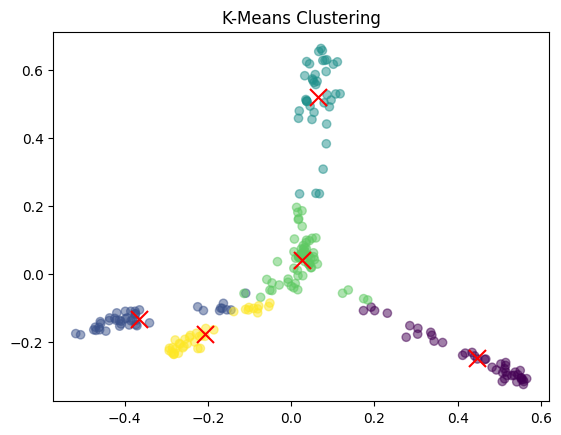

             File  Cluster
0     answer1.txt        3
1    answer10.txt        1
2    answer11.txt        1
3    answer12.txt        1
4    answer13.txt        1
..            ...      ...
225   answer6.txt        2
226   answer7.txt        2
227   answer8.txt        2
228   answer9.txt        2
229       ref.txt        2

[230 rows x 2 columns]


In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming tfidf_matrix is your TF-IDF matrix
# You may need to adjust the number of clusters (n_clusters) based on your data
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Optional: Visualize the clusters (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:, 1], marker='x', s=150, c='red')
plt.title('K-Means Clustering')
plt.show()

# Add the cluster labels to your DataFrame
df['Cluster'] = clusters

# View the results
print(df[['File', 'Cluster']])


In [12]:
r=pd.read_csv('preprocessed_data.csv')
r = pd.DataFrame({'Document': r['File'], 'Cluster': clusters})
# Write to CSV
csv_file_path = 'kmeans.csv'
r.to_csv(csv_file_path, index=False)

In [13]:
unique_clusters, cluster_counts = np.unique(clusters, return_counts=True)

# Print the count of documents in each cluster
for cluster_label, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster_label}: {count} documents")

Cluster 0: 43 documents
Cluster 1: 43 documents
Cluster 2: 39 documents
Cluster 3: 68 documents
Cluster 4: 37 documents


In [14]:
dense_tfidf_matrix = tfidf_matrix.toarray()

# Check if any negative value exists in the TF-IDF matrix
if np.any(dense_tfidf_matrix < 0):
    print("Negative values exist in the TF-IDF matrix.")
else:
    print("No negative values found in the TF-IDF matrix.")

No negative values found in the TF-IDF matrix.


In [15]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Convert similarity matrix to distance matrix
distance_matrix = 1 - cosine_sim


# Thresholding to handle negative values
distance_matrix[distance_matrix < 0] = 0


if np.any(distance_matrix < 0):
    print("Negative values exist in the distance matrix.")
else:
    print("No negative values found in the distance matrix.")

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.53, min_samples=7, metric='precomputed')
clusters = dbscan.fit_predict(distance_matrix)  # Use precomputed distance matrix

# Add cluster labels to preprocessed data
df['Cluster'] = clusters
# print(set(clust))

# Save results to CSV
df.to_csv('clustered_documents.csv', index=False)




No negative values found in the distance matrix.


In [16]:
# Assuming 'clusters' contains the cluster labels obtained from DBSCAN
# clusters = dbscan.fit_predict(distance_matrix)

# Count the occurrences of each cluster label
unique_clusters, cluster_counts = np.unique(clusters, return_counts=True)

# Print the count of documents in each cluster
for cluster_label, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster_label}: {count} documents")


Cluster -1: 78 documents
Cluster 0: 34 documents
Cluster 1: 26 documents
Cluster 2: 38 documents
Cluster 3: 20 documents
Cluster 4: 34 documents


In [17]:
# Initialize a dictionary to store document indices for each cluster
cluster_documents = {}

# Iterate over the cluster labels and document indices
for cluster_label, document_index in zip(clusters, range(len(clusters))):
    if cluster_label not in cluster_documents:
        cluster_documents[cluster_label] = [document_index]
    else:
        cluster_documents[cluster_label].append(document_index)

# Print the documents in each cluster
for cluster_label, documents in cluster_documents.items():
    print(f"Cluster {cluster_label}: {documents}")


Cluster -1: [0, 1, 3, 4, 5, 6, 9, 10, 12, 19, 20, 22, 40, 41, 44, 48, 58, 59, 66, 67, 70, 72, 73, 74, 77, 78, 80, 81, 83, 84, 85, 88, 96, 105, 108, 109, 110, 121, 122, 128, 138, 140, 142, 144, 148, 152, 153, 154, 159, 161, 162, 163, 164, 165, 166, 168, 170, 172, 173, 175, 176, 177, 179, 180, 181, 183, 186, 189, 194, 202, 203, 205, 207, 213, 216, 220, 225, 228]
Cluster 0: [2, 7, 8, 11, 13, 14, 15, 16, 17, 18, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 45, 79, 86, 87]
Cluster 1: [46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 64, 65, 68, 69, 71, 75, 76, 82, 89, 90, 91]
Cluster 2: [92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137]
Cluster 3: [139, 141, 143, 145, 146, 147, 149, 150, 151, 155, 156, 157, 158, 160, 167, 169, 171, 174, 178, 182]
Cluster 4: [184, 185, 187, 188, 190, 191, 192, 193, 195, 196, 197, 19

In [18]:
g=pd.read_csv('preprocessed_data.csv')
g = pd.DataFrame({'Document': g['File'], 'Cluster': clusters})
# Write to CSV
csv_file_path = 'dbscan.csv'
g.to_csv(csv_file_path, index=False)

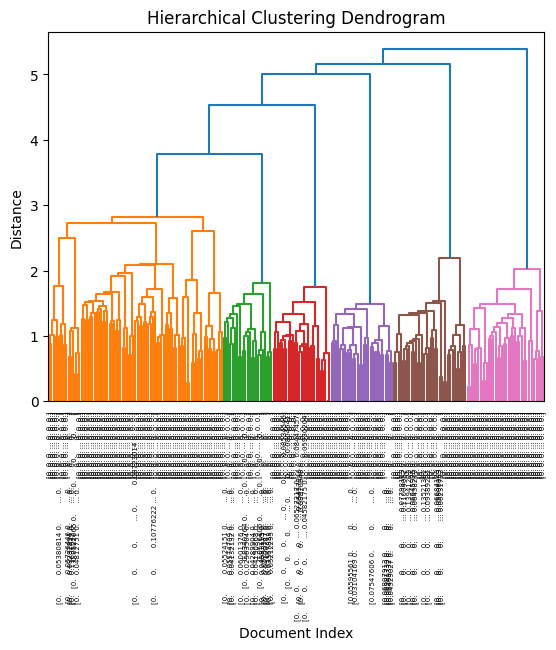

In [19]:
"""f=pd.read_csv('preprocessed_text.csv')
print(f['text'].isnull().sum()) #checking for missing values
f['text'].fillna('',inplace=True) #filling missing values
vectorizer=TfidfVectorizer() #vectorization
tfidf_matrix=vectorizer.fit_transform(f['text'])
feature_name=vectorizer.get_feature_names_out()
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(),columns=feature_name)
tfidf_df.to_csv('tfidf.csv',index=False)"""
# heirarchial clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

no_of_clusters = 5
heirarchial_clustering = AgglomerativeClustering(n_clusters=no_of_clusters, linkage='ward')
cluster_labels = heirarchial_clustering.fit_predict(tfidf_matrix.toarray())

# Dendrogram visualization

# Dendrogram visualization
linked = linkage(tfidf_matrix.toarray(), 'ward')
dendrogram(linked, orientation='top', labels=tfidf_matrix.toarray(), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Document Index')
plt.ylabel('Distance')
plt.show()

In [20]:
f=pd.read_csv('preprocessed_data.csv')
f = pd.DataFrame({'Document': f['File'], 'Cluster': cluster_labels})
# Write to CSV
csv_file_path = 'heirarchial.csv'
f.to_csv(csv_file_path, index=False)

In [21]:
unique_clusters, cluster_counts = np.unique(cluster_labels, return_counts=True)

# Print the count of documents in each cluster
for cluster_label, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster_label}: {count} documents")

Cluster 0: 104 documents
Cluster 1: 36 documents
Cluster 2: 34 documents
Cluster 3: 29 documents
Cluster 4: 27 documents


In [22]:
"""import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# Read preprocessed data from CSV
df = pd.read_csv('preprocessed_data.csv')



# Cluster the data (example: using KMeans)
num_clusters = 10  # Set the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign cluster labels to each file
df['Cluster'] = kmeans.labels_

# Extract features of files in each cluster
cluster_features = {}
for cluster_label in range(num_clusters):
    cluster_indices = df[df['Cluster'] == cluster_label].index
    cluster_tfidf = tfidf_matrix[cluster_indices]
    cluster_features[cluster_label] = cluster_tfidf

# Compute centroid of each cluster
cluster_centroids = {}
for cluster_label, cluster_tfidf in cluster_features.items():
    cluster_centroid = np.mean(cluster_tfidf, axis=0)
    
    cluster_centroids[cluster_label] = cluster_centroid

# Store cluster centroids and other information in a DataFrame
cluster_info = pd.DataFrame({
    'Cluster': list(cluster_centroids.keys()),
    'Centroid': list(cluster_centroids.values()),
    'NumFiles': [len(df[df['Cluster'] == cluster_label]) for cluster_label in cluster_centroids.keys()]
})

# Save the DataFrame to a CSV file
cluster_info.to_csv('cluster_info.csv', index=False)


"""

"import pandas as pd\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.cluster import KMeans\nimport numpy as np\n\n# Read preprocessed data from CSV\ndf = pd.read_csv('preprocessed_data.csv')\n\n\n\n# Cluster the data (example: using KMeans)\nnum_clusters = 10  # Set the number of clusters\nkmeans = KMeans(n_clusters=num_clusters, random_state=42)\nkmeans.fit(tfidf_matrix)\n\n# Assign cluster labels to each file\ndf['Cluster'] = kmeans.labels_\n\n# Extract features of files in each cluster\ncluster_features = {}\nfor cluster_label in range(num_clusters):\n    cluster_indices = df[df['Cluster'] == cluster_label].index\n    cluster_tfidf = tfidf_matrix[cluster_indices]\n    cluster_features[cluster_label] = cluster_tfidf\n\n# Compute centroid of each cluster\ncluster_centroids = {}\nfor cluster_label, cluster_tfidf in cluster_features.items():\n    cluster_centroid = np.mean(cluster_tfidf, axis=0)\n    \n    cluster_centroids[cluster_label] = cluster_centroid\n\

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity




# Clustering using k-means
num_clusters_kmeans = 5  # Example: Set the number of clusters for k-means
kmeans = KMeans(n_clusters=num_clusters_kmeans, random_state=42)
kmeans.fit(tfidf_matrix)
kmeans_labels = kmeans.labels_

# Clustering using DBSCAN
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Convert similarity matrix to distance matrix
distance_matrix = 1 - cosine_sim

# Thresholding to handle negative values
distance_matrix[distance_matrix < 0] = 0
dbscan = DBSCAN(eps=0.53, min_samples=7, metric='precomputed')
dbscan_labels = dbscan.fit_predict(distance_matrix)

# Clustering using hierarchical clustering
num_clusters_hierarchical = 5  # Example: Set the number of clusters for hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=num_clusters_hierarchical)
hierarchical_labels = hierarchical.fit_predict(tfidf_matrix.toarray())

# Collect features of files and cluster centroids/representative points
file_features = tfidf_matrix.toarray()

# Construct the matrix
num_features = file_features.shape[1]  # Number of features
num_algorithms = 3  # Number of clustering algorithms

# Initialize a dictionary to store matrices for each file
file_matrices = {}
centroids_k=[]
for j in range(num_clusters_kmeans):
    cluster_indices = np.where(kmeans_labels == j)[0]
    cluster_features = file_features[cluster_indices]
    if len(cluster_indices) > 0:
        centroids_k.append(np.mean(cluster_features, axis=0))

centroids_db=[]
for j in range(len(set(dbscan_labels))-1):
    cluster_indices = np.where(dbscan_labels == j)[0]
    cluster_features = file_features[cluster_indices]
    if len(cluster_indices) > 0:
        centroids_db.append(np.mean(cluster_features, axis=0))

centroids_hi=[]
for j in range(num_clusters_hierarchical):
    cluster_indices = np.where(hierarchical_labels == j)[0]
    cluster_features = file_features[cluster_indices]
    if len(cluster_indices) > 0:
        centroids_hi.append(np.mean(cluster_features, axis=0))

# Loop through each file
for i in range(len(df)):
    matrix = np.zeros((num_algorithms + 1, num_features))

    # First row represents file features
    matrix[0] = file_features[i]
    matrix[1] = centroids_k[kmeans_labels[i]]
    if dbscan_labels[i] == -1:
        matrix[2] = matrix[0]
    else:
        matrix[2] = centroids_db[dbscan_labels[i]]
    matrix[3] = centroids_hi[hierarchical_labels[i]]
    file_matrices[i]=matrix
    print(matrix)
# Now file_matrices dictionary contains the matrices for each file
# You can save or process these matrices as needed


c:\Users\91831\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01547193 0.00158474 ... 0.         0.0012828  0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01011626 0.00103618 ... 0.         0.00083875 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.02029326 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01011626 0.00103618 ... 0.         0.00083875 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.02029326 0.         0.        ]
 [0.         0.         0.         ... 0.025665   0.         0.        ]
 [0.         0.         0.         ... 0.025665   0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.0202932

In [50]:
# print(file_matrices)
# print(matrix[1].shap
# e)
print(matrix.shape)
print(matrix)
print(file_features.shape)
print(file_features[1])
print(num_features)
print(file_matrices)
# print(file_features[1].shape)
# print(*file_matrices.items(),sep='\n')


(4, 3949)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(230, 3949)
[0. 0. 0. ... 0. 0. 0.]
3949
{0: array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01547193, 0.00158474, ..., 0.        , 0.0012828 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01011626, 0.00103618, ..., 0.        , 0.00083875,
        0.        ]]), 1: array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02029326, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01011626, 0.00103618, ..., 0.        , 0.00083875,
        0.        ]]), 2: array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0

In [51]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

# Specify the desired number of features after dimensionality reduction
n_components = 230  # Adjust the number of components as needed

# Initialize a TruncatedSVD object with the desired number of components
svd = TruncatedSVD(n_components=n_components)

# # Loop through each file matrix
for key, matrix in file_matrices.items():
#     # # Convert the matrix to a sparse CSR matrix if it's not already sparse
#     # if not isinstance(matrix, csr_matrix):
#     #     matrix_sparse = csr_matrix(matrix)
#     # else:
#     #     matrix_sparse = matrix
    
#     # # Apply TruncatedSVD to the sparse feature matrix
#     # reduced_matrix = svd.fit_transform(matrix_sparse)
#     # print(reduced_matrix)
    X=matrix
    n_components = 230  # Adjust the number of components as needed


    # Fit TruncatedSVD to the data and transform the data to the reduced dimensionality
    X_reduced = svd.fit_transform(X)

    # X_reduced now contains the data after dimensionality reduction
    print("Shape of reduced data:", X_reduced.shape)
    # Store the reduced feature matrix back in the dictionary
    file_matrices[key] = X_reduced
# # for key, matrix in file_matrices.items():
# #     X_centered = matrix - np.mean(matrix, axis=0)

# #     # Compute the covariance matrix
# #     cov_matrix = np.cov(X_centered, rowvar=False)

# #     # cov_matrix now contains the covariance matrix
# #     print("Shape of covariance matrix:", cov_matrix.shape)

# from sklearn.decomposition import PCA

# # Assuming X is your data matrix with shape (n_samples, n_features)
#   # Your data matrix with shape (n_samples, n_features)

# # Specify the desired number of components after dimensionality reduction
# n_components = 4 # Adjust the number of components as needed

# # Initialize a PCA object with the desired number of components

# for key, matrix in file_matrices.items():
#     X=matrix

#     pca = PCA(n_components=n_components)

#     # Fit PCA to the data and transform the data to the reduced dimensionality
#     X_reduced = pca.fit_transform(X)

#     # X_reduced now contains the data after dimensionality reduction
#     print("Shape of reduced data:", X_reduced.shape)
#     file_matrices[key] = X_reduced


Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of reduced data: (4, 4)
Shape of r

In [52]:
import numpy as np

# Initialize a dictionary to store covariance matrices for each file
covariance_matrices = {}

# Loop through each file matrix
for key, matrix in file_matrices.items():
    # Calculate the covariance matrix for the current feature matrix
    covariance_matrix = np.cov(matrix, rowvar=False)  # Set rowvar=False for column-wise calculation

    # Store the covariance matrix in the dictionary
    covariance_matrices[key] = covariance_matrix


In [53]:
print(covariance_matrices)

{0: array([[ 2.92875189e-01, -1.02956076e-01, -1.68990792e-03,
         1.52050273e-19],
       [-1.02956076e-01,  3.65216441e-02, -4.62551942e-04,
        -5.74814201e-20],
       [-1.68990792e-03, -4.62551942e-04,  3.40408780e-03,
         1.20699350e-20],
       [ 1.52050273e-19, -5.74814201e-20,  1.20699350e-20,
         1.28324800e-37]]), 1: array([[ 2.03325773e-01, -8.52555162e-02, -4.43009342e-02,
        -1.07833591e-18],
       [-8.52555162e-02,  9.41565655e-02, -7.55622550e-03,
         1.26577097e-18],
       [-4.43009342e-02, -7.55622550e-03,  2.13436768e-02,
        -1.29061926e-19],
       [-1.07833591e-18,  1.26577097e-18, -1.29061926e-19,
         1.70525047e-35]]), 2: array([[ 1.38458542e-02,  3.80455440e-02, -2.37479417e-03,
        -9.35658126e-22],
       [ 3.80455440e-02,  1.16197938e-01,  1.33133154e-04,
         1.84579213e-18],
       [-2.37479417e-03,  1.33133154e-04,  4.21086540e-03,
         1.05599265e-18],
       [-9.35658126e-22,  1.84579213e-18,  1.055992

In [54]:
# Initialize a dictionary to store the highest eigenvectors for each covariance matrix
highest_eigenvectors = {}

# Iterate through each covariance matrix
for key, covariance_matrix in covariance_matrices.items():
    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Find the index of the eigenvalue corresponding to the highest eigenvalue
    index_max_eigenvalue = np.argmax(eigenvalues)
    
    # Obtain the corresponding eigenvector (highest eigenvector)
    highest_eigenvector = eigenvectors[:, index_max_eigenvalue]
    
    # Store the highest eigenvector in the dictionary
    highest_eigenvectors[key] = highest_eigenvector

# Now highest_eigenvectors contains the highest eigenvector for each covariance matrix


In [55]:
print(highest_eigenvectors)

{0: array([-9.43297132e-01,  3.31920108e-01,  4.42286347e-03, -4.93616708e-19]), 1: array([-8.76737765e-01,  4.56575730e-01,  1.51226633e-01,  5.88889757e-18]), 2: array([-3.14305871e-01, -9.49308723e-01,  4.97682721e-03, -1.35618192e-17]), 3: array([-8.77157560e-01,  4.57233849e-01,  1.46737256e-01,  3.77465922e-18]), 4: array([-8.78390247e-01,  4.52396089e-01,  1.54169884e-01,  8.05078699e-18]), 5: array([-8.77660599e-01,  4.52866758e-01,  1.56918997e-01, -3.81417046e-18]), 6: array([-9.44579825e-01,  3.28253185e-01,  4.33600759e-03, -1.89558368e-18]), 7: array([-3.07329471e-01, -9.51591265e-01,  4.76034385e-03, -6.69508425e-18]), 8: array([-3.69007500e-01, -9.29399777e-01,  7.03702671e-03, -6.08207467e-19]), 9: array([-8.87303215e-01,  4.28487698e-01,  1.70561710e-01, -2.14855814e-18]), 10: array([-8.75367308e-01,  4.60793747e-01,  1.46291486e-01, -1.17996186e-17]), 11: array([-3.07246726e-01, -9.51618047e-01,  4.74784450e-03, -5.48601853e-18]), 12: array([-8.86196711e-01,  4.350963

In [30]:
"""import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each eigen vector
for file_name, eigen_vector in highest_eigenvectors.items():
    G.add_node(file_name, eigen_vector=eigen_vector)

# Add weighted edges between nodes based on relationships
# You need to define your own logic for determining relationships between eigen vectors

# For demonstration purposes, let's add weighted edges between all pairs of nodes
for node1, vector1 in highest_eigenvectors.items():
    for node2, vector2 in highest_eigenvectors.items():
        if node1 != node2:
            weight = # Your logic to determine the weight between the eigen vectors of node1 and node2
            G.add_edge(node1, node2, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Relationships Between Eigen Vectors')
plt.show()"""


"import networkx as nx\nimport matplotlib.pyplot as plt\n\n# Create a directed graph\nG = nx.DiGraph()\n\n# Add nodes for each eigen vector\nfor file_name, eigen_vector in highest_eigenvectors.items():\n    G.add_node(file_name, eigen_vector=eigen_vector)\n\n# Add weighted edges between nodes based on relationships\n# You need to define your own logic for determining relationships between eigen vectors\n\n# For demonstration purposes, let's add weighted edges between all pairs of nodes\nfor node1, vector1 in highest_eigenvectors.items():\n    for node2, vector2 in highest_eigenvectors.items():\n        if node1 != node2:\n            weight = # Your logic to determine the weight between the eigen vectors of node1 and node2\n            G.add_edge(node1, node2, weight=weight)\n\n# Draw the graph\npos = nx.spring_layout(G)  # Layout for better visualization\nnx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')\nlabels = nx.get_edge_attr

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize an empty graph
G = nx.Graph()

# Add nodes representing eigen vectors
for key, vector in highest_eigenvectors.items():
    # Convert the eigen vector values to a tuple to use as the node identifier
    node_id = tuple(vector)
    G.add_node(node_id)

# Calculate weights between pairs of eigen vectors based on clustering information
for i, (_, row1) in enumerate(df.iterrows()):
    for j, (_, row2) in enumerate(df.iterrows()):
        if j > i:  # Avoid redundant calculations and self-loops
            # Calculate weight based on how many clustering algorithms they lie in the same cluster
            weight = 0
            if kmeans_labels[i] == kmeans_labels[j]:
                weight += 1
            if dbscan_labels[i] == dbscan_labels[j]:
                weight += 1
            if hierarchical_labels[i] == hierarchical_labels[j]:
                weight += 1
            if weight > 0:
                G.add_edge(i, j, weight=weight)



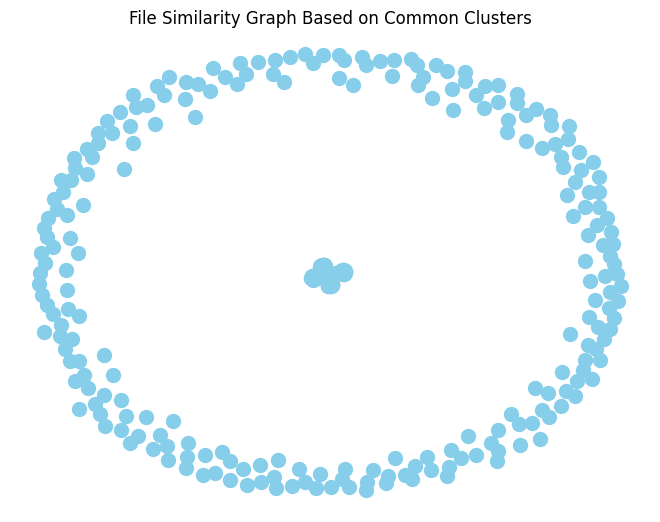

In [60]:
# Plot the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw(G, pos,  node_size=100, node_color='skyblue',font_size=10, width=0.5)  # Adjust the width parameter
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title('File Similarity Graph Based on Common Clusters')
plt.show()


In [33]:
# import networkx as nx
# import matplotlib.pyplot as plt

# # Initialize a graph
# G = nx.Graph()

# # Loop through each pair of files
# for i, (key1, vector1) in enumerate(highest_eigenvectors.items()):
#     for key2, vector2 in list(highest_eigenvectors.items())[i+1:]:
#         # Calculate the number of common features between eigen vectors
#         common_features = np.sum(np.isclose(vector1, vector2))
        
#         # Add an edge between the nodes representing the two eigen vectors
#         G.add_edge(key1, key2, weight=common_features)

# # Plot the graph
# pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
# edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
# nx.draw(G, pos, with_labels=True, node_size=20, node_color='skyblue', font_size=10, font_weight='bold')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
# plt.title('File Similarity Graph Based on Common Features between Eigen Vectors')
# plt.show()


In [34]:
# edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
# nx.draw(G, pos, with_labels=True, node_size=20, node_color='skyblue', font_size=10, font_weight='bold')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
# plt.title('File Similarity Graph Based on Common Features between Eigen Vectors')
# plt.show()